For this practical work, the student will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import random
from matplotlib.pyplot import figure
random.seed(0)
figure(figsize=(15, 6), dpi=80)
%config Completer.use_jedi=False

<Figure size 1200x480 with 0 Axes>

In [2]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [3]:
X = [random.randrange(0, 20, 1) for i in range(20)]
 
print ("Random number list is : " +  str(X))
print(len(X))

Random number list is : [12, 13, 1, 8, 16, 15, 12, 9, 15, 11, 18, 6, 16, 4, 9, 4, 3, 19, 8, 17]
20


In [4]:
X=np.array(X)
X

array([12, 13,  1,  8, 16, 15, 12,  9, 15, 11, 18,  6, 16,  4,  9,  4,  3,
       19,  8, 17])

In [5]:
y= -2*X+1
y

array([-23, -25,  -1, -15, -31, -29, -23, -17, -29, -21, -35, -11, -31,
        -7, -17,  -7,  -5, -37, -15, -33])

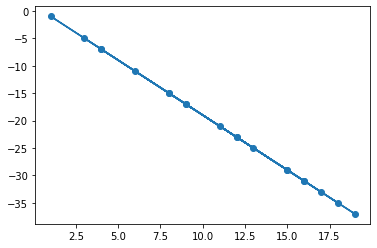

In [6]:
plt.plot(X,y)
plt.scatter(X,y)
plt.show()

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

# Batch GD

In [7]:
def Batch_GD(X,y,MaxEpochs,alpha,convergenceCritria):
    loss=[]
    thetasL0=[]
    thetasL1=[]
    yPredict_Epochs=[]
    x=np.column_stack((np.ones(len(X),dtype=int), X))
    y= y.reshape(-1,1)
    m=(x.shape)[0]
    thetas=np.zeros((x.shape[1],1))
    count=0
    epoch=0
    
    while epoch < MaxEpochs:
        count+=1
        yPredict= x@thetas
        
        MSEold=(np.sum((yPredict-y)**2))/(2*m)
        
        Grad= (np.transpose(x)@(yPredict-y))/m

        thetas= thetas - (alpha*Grad)
        thetasL0.append(thetas[0])
        thetasL1.append(thetas[1])
        
        yPredict= x@thetas

        MSEnew=(np.sum((yPredict-y)**2))/(2*m)
        
        loss.append(MSEnew)
        yPredict_Epochs.append(yPredict)
        if abs(MSEold-MSEnew)< convergenceCritria:
            print(f"Convergence occure at {count} iterations")
            return r2_score(y,yPredict), thetas, yPredict,loss,thetasL1,thetasL0,yPredict_Epochs
        
        epoch+=1

    print(f"We Reach {MaxEpochs} iterations")
    return r2_score(y,yPredict), thetas, yPredict,loss,thetasL1,thetasL0,yPredict_Epochs

### Try your function with any input parameterss of your choice.

In [8]:
Score,thetas,yP,loss,thetasL1,thetasL0,yPredict_Epochs=Batch_GD(X,y,1000,0.0001,0.0001)

Convergence occure at 388 iterations


### Calculate r2 score

In [9]:
Score

0.9977054278129595

### Plot loss vs. epochs

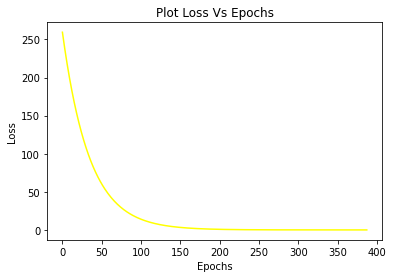

In [10]:
plt.plot(loss , color = 'yellow')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Plot Loss Vs Epochs")
plt.show()

### Plot Theta_0 vs. loss and Theta_1 vs. loss

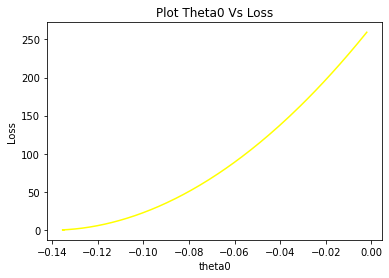

In [11]:
plt.plot(thetasL0 ,loss,color = 'yellow')
plt.xlabel('theta0')
plt.ylabel('Loss')
plt.title("Plot Theta0 Vs Loss")
plt.show()

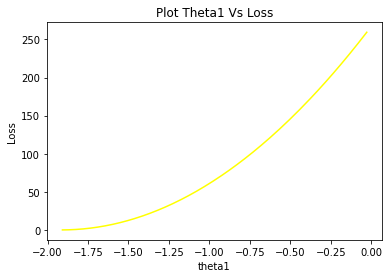

In [12]:
plt.plot(thetasL1 ,loss,color = 'yellow')
plt.xlabel('theta1')
plt.ylabel('Loss')
plt.title("Plot Theta1 Vs Loss")
plt.show()

### Plot all regression lines till converge

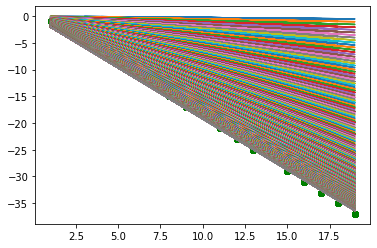

In [13]:
for p in yPredict_Epochs:
    plt.scatter(X,y, color = 'green')
    plt.plot(X, p)
plt.show()

### Plot The Best Regression Line

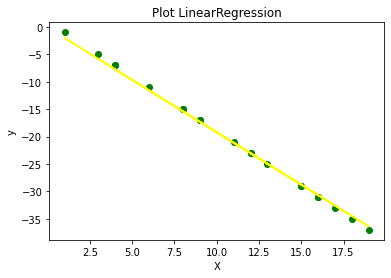

In [14]:
plt.scatter(X,y, color = 'green')
plt.plot(X,yP , color = 'yellow')
plt.xlabel('X')
plt.ylabel('y')
plt.title("Plot LinearRegression")
plt.show()

_____________________________________

# Mini Batch GD

In [15]:
def MiniBatch_GD(X,y,MaxEpochs,batchSize,alpha,convergenceCritria):
    loss=[]
    lossBatchs=[]
    thetasL=[]
    thetasL0=[]
    thetasL1=[]
    yPredictL=[]
    yPredict_Epochs=[]
    x=np.column_stack((np.ones(len(X),dtype=int), X))
    y= y.reshape(-1,1)
    m=(x.shape)[0]
    n_Batchs=m/batchSize
    thetas=np.zeros((x.shape[1],1))
    count=0
    epoch=0

    while epoch<MaxEpochs:
        count+=1
        
        for i in range(0,m,int(n_Batchs)):
            yPredict= x[i:i+int(n_Batchs)]@thetas
            yPredictL.append(yPredict)
            
            MSEold=(np.sum((yPredict-y[i:i+int(n_Batchs)])**2))/(2*n_Batchs)
            
            Grad= (np.transpose(x[i:i+int(n_Batchs)])@(yPredict-y[i:i+int(n_Batchs)]))/int(n_Batchs)

            thetas= thetas - (alpha*Grad)
            thetasL.append(thetas)
            thetasL0.append(thetas[0])
            thetasL1.append(thetas[1])
            
            yPredict= x[i:i+int(n_Batchs)]@thetas
            YP_Total= x@thetas
            
            MSEnew=(np.sum((yPredict-y[i:i+int(n_Batchs)])**2))/(2*n_Batchs)
            lossBatchs.append(MSEnew)
        yPredict_Epochs.append(YP_Total)  
        loss.append(MSEnew)
        
        if abs(MSEold-MSEnew)< convergenceCritria:
            print(f"Convergence occure at {count} iterations")
            yP=np.concatenate(yPredictL, axis=0)
            yP=np.reshape(yP[-1*m:],(m,1))
            
            return r2_score(y,yP), thetasL[-1], yP,loss,lossBatchs,thetasL1,thetasL0,yPredict_Epochs
        
        
        epoch+=1
        
        yP=np.concatenate(yPredictL, axis=0)
        yP=np.reshape(yP[-1*m:],(m,1))
        
    print(f"We Reach {MaxEpochs} iterations")
    return r2_score(y,yP), thetasL[-1], yP,loss,lossBatchs,thetasL1,thetasL0,yPredict_Epochs

### Try your function with any input parameterss of your choice.

In [16]:
Score,thetas,yP,loss,lossBatchs,thetasL1,thetasL0,yPredict_Epochs=MiniBatch_GD(X,y,1000,5,0.0001,0.001)

Convergence occure at 80 iterations


### Calculate r2 score

In [17]:
Score

0.9977189458213879

In [18]:
thetas

array([[-0.13476189],
       [-1.90938528]])

### Plot loss vs. epochs

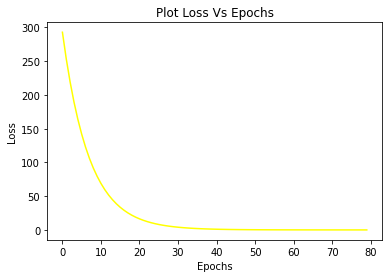

In [19]:
plt.plot(loss , color = 'yellow')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Plot Loss Vs Epochs")
plt.show()

### Plot Theta_0 vs. loss and Theta_1 vs. loss

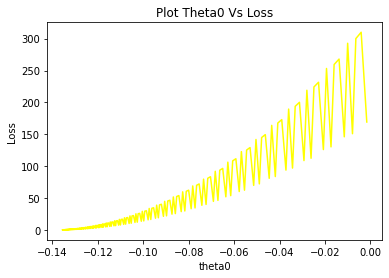

In [20]:
plt.plot(thetasL0 ,lossBatchs,color = 'yellow')
plt.xlabel('theta0')
plt.ylabel('Loss')
plt.title("Plot Theta0 Vs Loss")
plt.show()

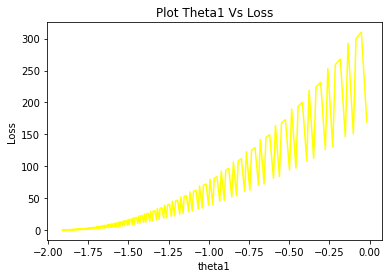

In [21]:
plt.plot(thetasL1 ,lossBatchs,color = 'yellow')
plt.xlabel('theta1')
plt.ylabel('Loss')
plt.title("Plot Theta1 Vs Loss")
plt.show()

### Plot all regression lines till converge

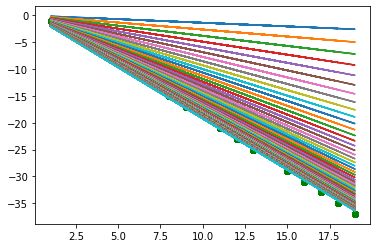

In [22]:
for p in yPredict_Epochs:
    plt.scatter(X,y, color = 'green')
    plt.plot(X, p)
plt.show()

### Plot The Best Regression Line

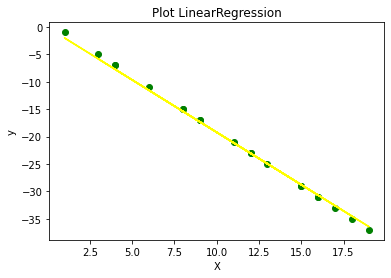

In [23]:
plt.scatter(X,y, color = 'green')
plt.plot(X,yP , color = 'yellow')
plt.xlabel('X')
plt.ylabel('y')
plt.title("Plot LinearRegression")
plt.show()

# Stocastic GD

#### Update the implementation of the Batch GD to beStochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD

### Try your function with any input parameterss of your choice.

In [24]:
Score,thetas,yP,loss,lossBatchs,thetasL1,thetasL0,yPredict_Epochs=MiniBatch_GD(X,y,1000,len(X),0.00001,0.001)

Convergence occure at 165 iterations


### Calculate r2 score

In [25]:
Score

0.9974098103745408

In [26]:
thetas

array([[-0.13535354],
       [-1.89879875]])

### Plot loss vs. epochs

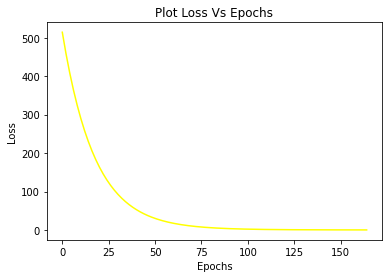

In [27]:
plt.plot(loss , color = 'yellow')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Plot Loss Vs Epochs")
plt.show()

### Plot Theta_0 vs. loss and Theta_1 vs. loss

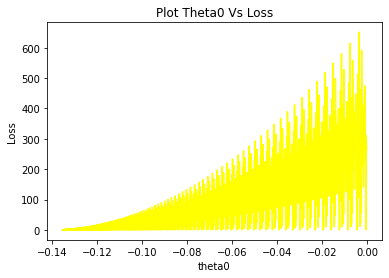

In [28]:
plt.plot(thetasL0 ,lossBatchs,color = 'yellow')
plt.xlabel('theta0')
plt.ylabel('Loss')
plt.title("Plot Theta0 Vs Loss")
plt.show()

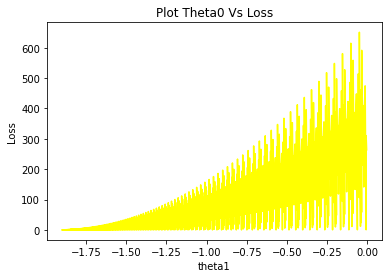

In [29]:
plt.plot(thetasL1 ,lossBatchs,color = 'yellow')
plt.xlabel('theta1')
plt.ylabel('Loss')
plt.title("Plot Theta0 Vs Loss")
plt.show()

### Plot all regression lines till converge

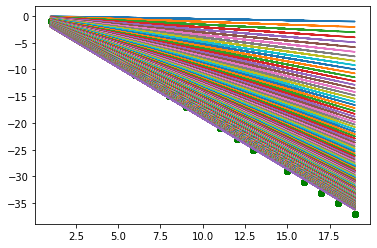

In [30]:
for p in yPredict_Epochs:
    plt.scatter(X,y, color = 'green')
    plt.plot(X, p)
plt.show()

### Plot The Best Regression Line

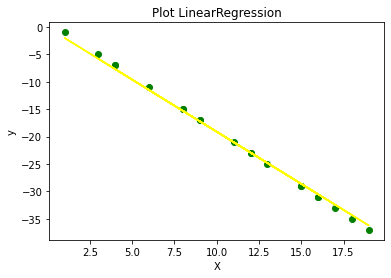

In [31]:
plt.scatter(X,y, color = 'green')
plt.plot(X,yP , color = 'yellow')
plt.xlabel('X')
plt.ylabel('y')
plt.title("Plot LinearRegression")
plt.show()

___________________________________________